In [1]:
import numpy as np
from PIL import Image, ImageFilter
import cv2
from IPython.display import display
from matplotlib import pyplot as plt
import glob

In [30]:
images = glob.glob(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\2\DIP_HW2\inputs\P3\frames\*.png')
datas = []
names = []

for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    datas.append(img)      
    names.append(image.split('\\')[-1][:-4])


In [32]:
images = glob.glob(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\2\DIP_HW2\inputs\P3\tests\*.png')
test_datas = []
test_names = []

for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_datas.append(img)      
    test_names.append(image.split('\\')[-1][:-4])

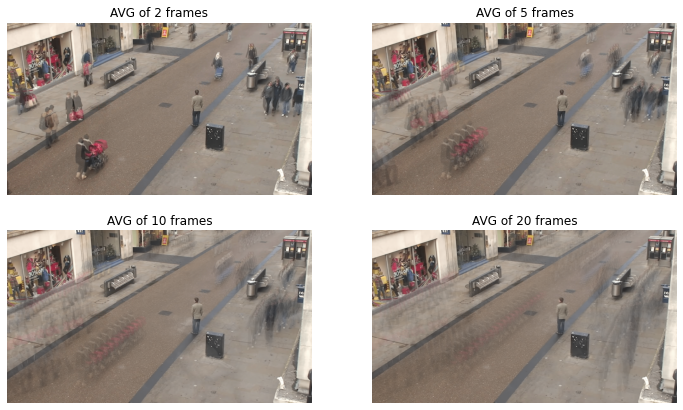

In [33]:
backgrounds = get_background(datas, count=[2, 5, 10, 20])

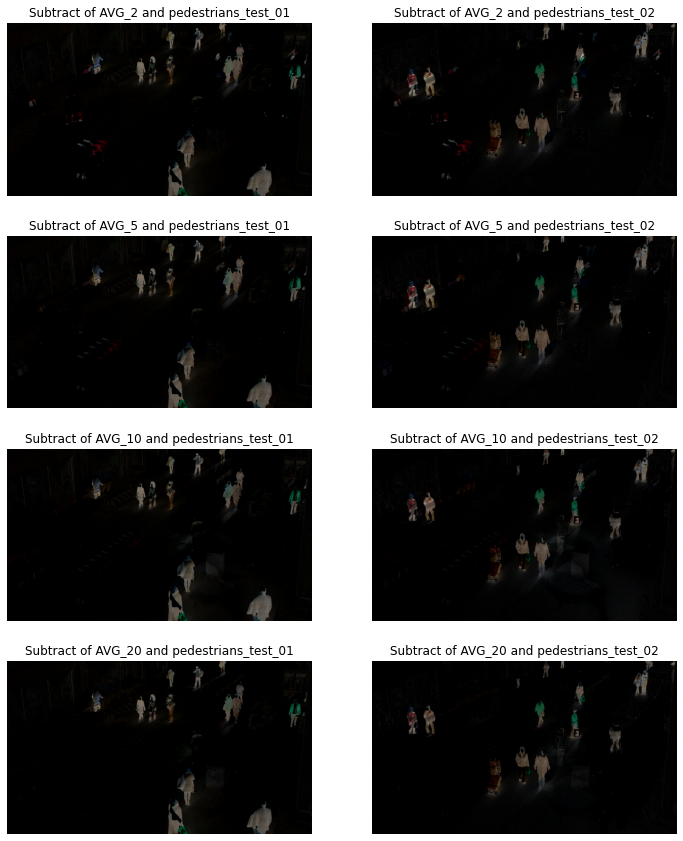

In [56]:
count = [2, 5, 10, 20]
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
results = []
for i, background in enumerate(backgrounds):
    for j, test in enumerate(test_datas):
        sub = np.subtract(background.astype(np.float16), test)
        for k in range(sub.reshape(-1).shape[0]):
            if sub.reshape(-1)[k] < 0:
                sub.reshape(-1)[k] = 0
        axes[i, j].imshow(sub.astype(np.uint8))
        axes[i, j].set_title('Subtract of AVG_{} and {}'.format(count[i], test_names[j]))
        axes[i, j].axis('off')
        results.append(sub)
plt.show()

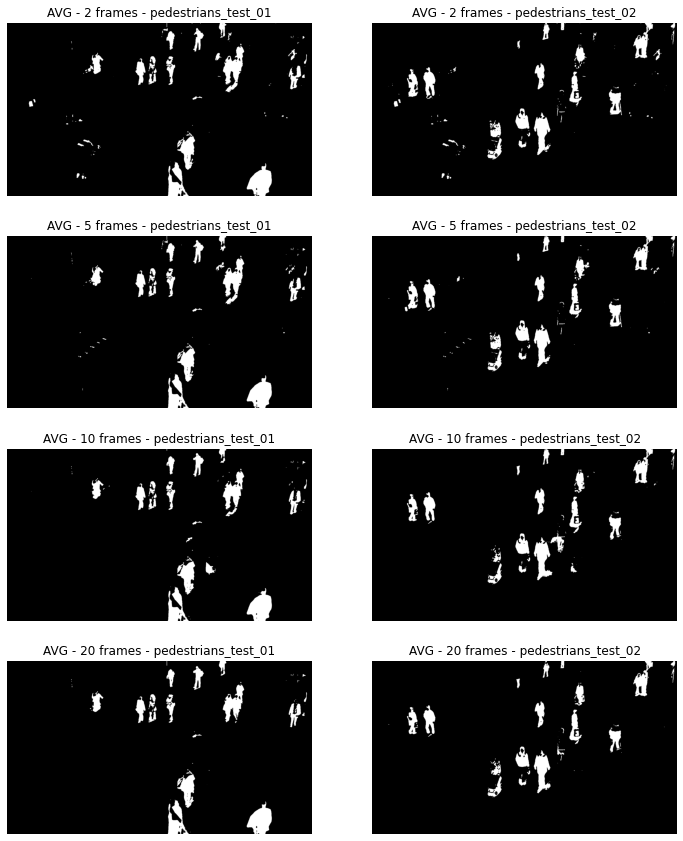

In [58]:
count = [2,2,5 ,5, 10,10, 20,20]


fig, axes = plt.subplots(4, 2, figsize=(12, 15))
masks = []
for i, (res, ax) in enumerate(zip(results, axes.reshape(-1))):
    res = res.astype(np.uint8)
    res = cv2.cvtColor(res.astype(np.uint8), cv2.COLOR_RGB2GRAY)
    res = cv2.inRange(res, 25, 250)
    _, res = cv2.threshold(res, 0, 1, cv2.THRESH_BINARY)
    res = cv2.medianBlur(res, 5)
    masks.append(res)
    ax.imshow(res, cmap='gray')
    ax.set_title('AVG - {} frames - {}'.format(count[np.mod(i, 8)], test_names[np.mod(i, 2)]))
    ax.axis('off')
plt.show()

In [63]:
test_names

['pedestrians_test_01', 'pedestrians_test_02']

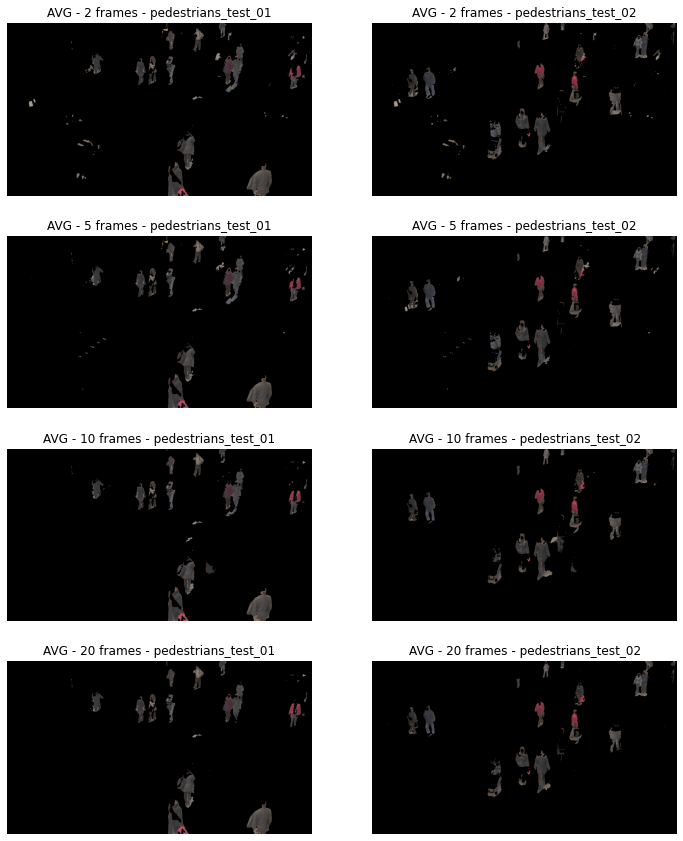

In [66]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
for i, (mask, ax) in enumerate(zip(masks, axes.reshape(-1))):
    individuals = np.zeros(test.shape).astype(np.uint8)
    temp = test_datas[0] if np.mod(i, 2) == 0 else test_datas[1]
    for d in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[d, j] == 1:
                individuals[d, j] = temp[d, j]
    ax.imshow(individuals)
    ax.set_title('AVG - {} frames - {}'.format(count[np.mod(i, 8)], test_names[np.mod(i, 2)]))
    ax.axis('off')
plt.show()

In [67]:
def get_background_median(frames, count):
    backgrounds = []
    fig, axes = plt.subplots(2, 2, figsize=(12, 7))
    for cnt, ax in zip(count, axes.reshape(-1)):
        
        imgs = np.asarray(frames[:cnt])
        median = np.median(imgs, axis=0)
        median = median.astype(np.uint8)
        backgrounds.append(median)
        
        ax.imshow(median)
        ax.set_title('Median of {} frames'.format(cnt))
        ax.axis('off')
    plt.show()
    return backgrounds

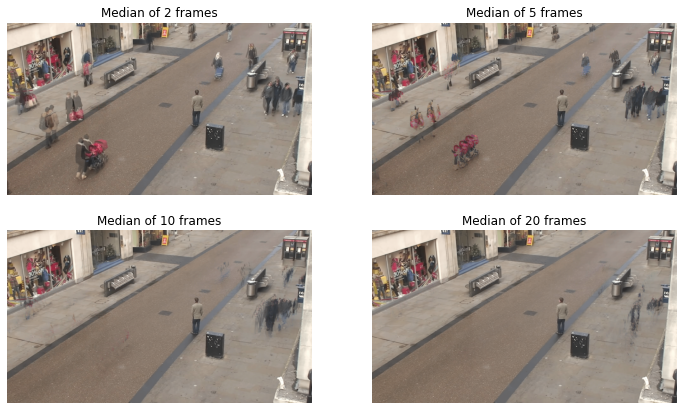

In [69]:
backgrounds_median = get_background_median(datas, count=[2, 5, 10, 20])


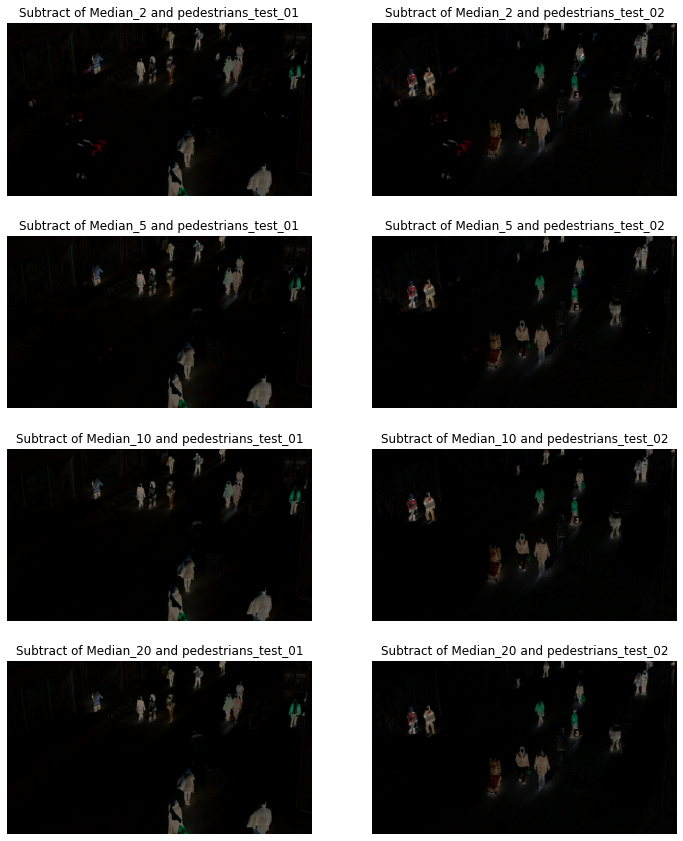

In [71]:
count = [2, 5, 10, 20]
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
results_median = []
for i, background in enumerate(backgrounds_median):
    for j, test in enumerate(test_datas):
        sub = np.subtract(background.astype(np.float16), test)
        for k in range(sub.reshape(-1).shape[0]):
            if sub.reshape(-1)[k] < 0:
                sub.reshape(-1)[k] = 0
        axes[i, j].imshow(sub.astype(np.uint8))
        axes[i, j].set_title('Subtract of Median_{} and {}'.format(count[i], test_names[j]))
        axes[i, j].axis('off')
        results_median.append(sub)
plt.show()

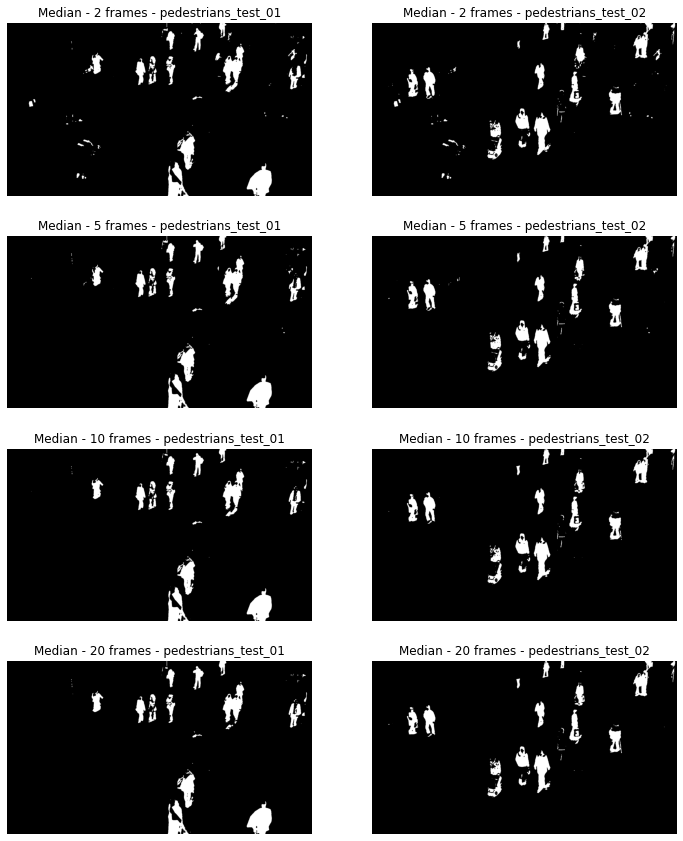

In [72]:
count = [2,2,5 ,5, 10,10, 20,20]
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
masks_median = []
for i, (res, ax) in enumerate(zip(results_median, axes.reshape(-1))):
    res = res.astype(np.uint8)
    res = cv2.cvtColor(res.astype(np.uint8), cv2.COLOR_RGB2GRAY)
    res = cv2.inRange(res, 25, 2505)
    _, res = cv2.threshold(res, 0, 1, cv2.THRESH_BINARY)
    res = cv2.medianBlur(res, 5)
    masks_median.append(res)
    ax.imshow(res, cmap='gray')
    ax.set_title('Median - {} frames - {}'.format(count[np.mod(i,8)], test_names[np.mod(i, 2)]))
    ax.axis('off')
plt.show()

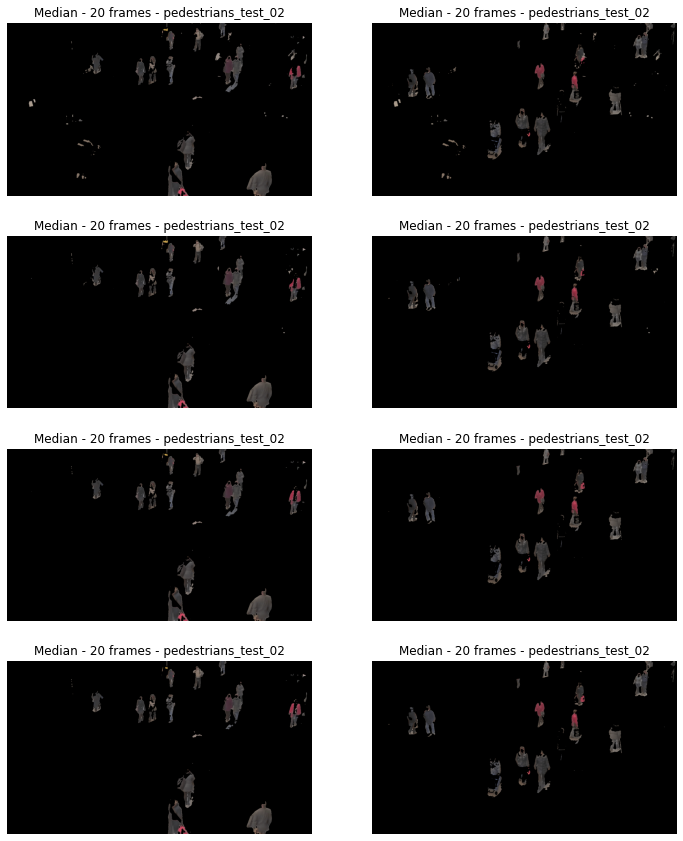

In [73]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
for i, (mask, ax) in enumerate(zip(masks_median, axes.reshape(-1))):
    individuals = np.zeros(test.shape).astype(np.uint8)
    temp = test_datas[0] if np.mod(i, 2) == 0 else test_datas[1]
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i, j] == 1:
                individuals[i, j] = temp[i, j]

    ax.imshow(individuals)
    ax.set_title('Median - {} frames - {}'.format(count[np.mod(i, 8)], test_names[np.mod(i, 2)]))
    ax.axis('off')
plt.show()

In [74]:
def count_pedestrians(img):
    count = 0
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 30 and h > 50:
            cv2.rectangle(img, (x,y), (x + w, y + h), (255, 255, 0), 3)
            count += 1
    return img, count

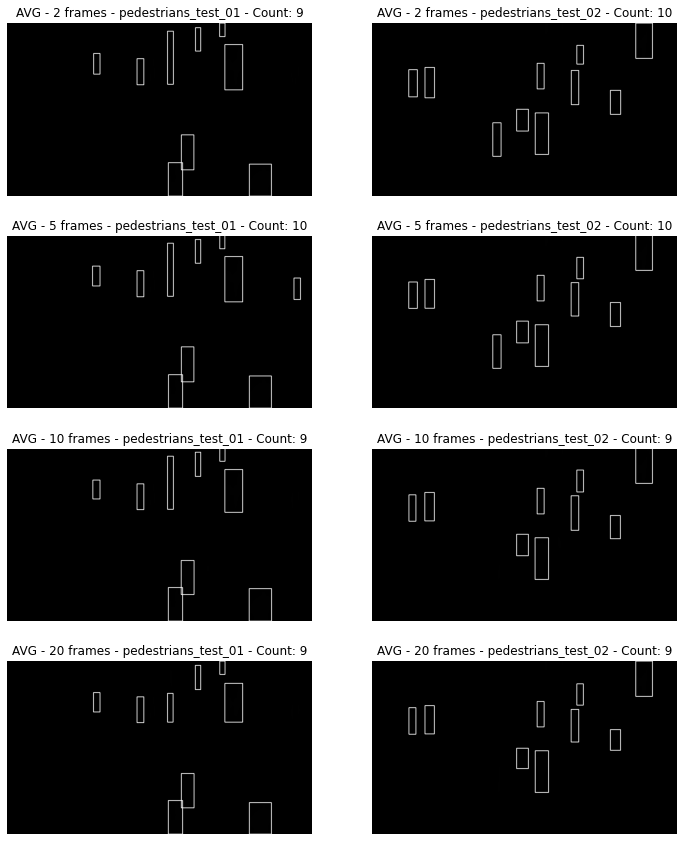

In [76]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
for i, (mask, ax) in enumerate(zip(masks, axes.reshape(-1))):
    res = cv2.GaussianBlur(mask, (5, 251), 0)
    temp, cnt = count_pedestrians(res)
    ax.imshow(temp, cmap='gray')
    ax.set_title('AVG - {} frames - {} - Count: {}'.format(count[np.mod(i, 8)], test_names[np.mod(i, 2)], cnt))
    ax.axis('off')
plt.show()

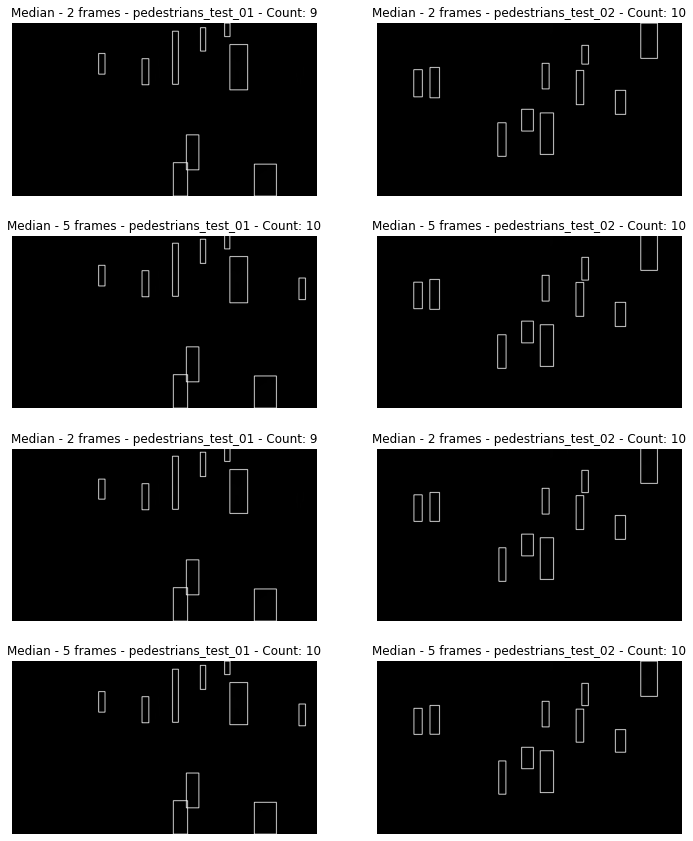

In [77]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
for i, (mask, ax) in enumerate(zip(masks_median, axes.reshape(-1))):
    res = cv2.GaussianBlur(mask, (5, 251), 0)
    temp, cnt = count_pedestrians(res)
    ax.imshow(temp, cmap='gray')
    ax.set_title('Median - {} frames - {} - Count: {}'.format(count[np.mod(i, 4)], test_names[np.mod(i, 2)], cnt))
    ax.axis('off')
plt.show()

In [ ]:
aa